## 자동화된 이미지 크롤링 및 폴더 저장

* input 함수를 이용한 검색어 입력
* 검색어에 따라 총 페이지 수가 자동 변경되도록 코드 작성
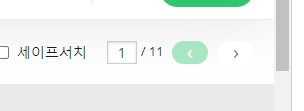
* 자동으로 폴더 생성(if exists=true) 및 이미지 저장

> *총 페이지 수 코드 작성>
    ## 방법 1 : 파싱 후 select, 슬라이싱 
    # html = driver.page_source
    # soup = BeautifulSoup(html, 'html.parser')
    # page = int(soup.select_one('div.container--3_1NG span').text[슬라이싱])
    
    ## 방법 2 : 총 페이지 수의 XPATH를 찾고 원하는 text를 추출하는 방식 
    # driver.find_element와 replace를 활용

<hr>

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from bs4 import BeautifulSoup
import requests
import os

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
driver = webdriver.Chrome(options=options)

url = 'https://pixabay.com/ko/'
driver.get(url)
sleep(2)

## input함수를 활용한 검색어 입력
input_text = driver.find_element(by=By.CSS_SELECTOR, value ='input.searchInput--37MDR')
sleep(1)
word = input('검색어를 입력하세요 :')
input_text.send_keys(word)
input_text.send_keys(Keys.RETURN)

## 총 페이지 수 코드 작성
page_element = driver.find_element(by=By.XPATH, value='//*[@id="app"]/div[2]/div[1]/div/div[3]/div/span[1]')
total_page = int(page_element.text.replace('/',''))

검색어를 입력하세요 :구슬


> *이미지 다운로드 메서드 정의
    # alt속성이 있는 img태그의 엘리먼트 추출 
    # img태그 내 src 링크 추출 ('src', 'data-lazy-src')
    # byte형태의 링크를 이미지 파일로 저장 ('wb' mode file open-write)

In [3]:
## 디렉토리에 img 경로/폴더 생성
word = '\img'
save_path = os.path.join('D:',word)
os.makedirs(save_path, exist_ok=True)

## 이미지 다운로드 메서드 정의
def pagecrawl() :
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    img_element = soup.select('img[alt]')
           
    for idx, img in enumerate(img_element, 1) :      
        if img.get('data-lazy-src') :
            src = img.get('data-lazy-src')
        else :
            src = img.get('src')
        
        file_name = os.path.join(save_path, f'p{current_page}_{idx}.jpg')  
        img_resource = requests.get(src).content
        with open(file_name, 'wb') as file :
            file.write(img_resource)
    sleep(1)

In [4]:
## 페이지루프 + 전체 페이지의 이미지 다운로드
for current_page in range(1, total_page+1) :
    pagecrawl()
    if current_page == 1 :
        driver.find_element(by=By.XPATH, value='//*[@id="app"]/div[2]/div[1]/div/div[3]/div/a').click()
        sleep(1)
    elif current_page == total_page :
        break
    else :
        driver.find_element(by=By.XPATH, value='//*[@id="app"]/div[2]/div[1]/div/div[3]/div/a[2]').click()
        sleep(1)
print('<< 작업 완료 >>')

<< 작업 완료 >>
